# 对数据进行客户等级评估，进行客户群像聚类并使用RFM评估模型
## R:Recency最近一次消费 F:Frequency消费频率 M:Monetary消费金额

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"]=['SimHei']
plt.rcParams['axes.unicode_minus']=False
%matplotlib inline

In [2]:
df = pd.read_csv("customer_data.csv")

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [6]:
duplicated_df = df.duplicated(keep='first')
removed_rows = df[duplicated_df]
print('重复的行:')
print(removed_rows)
df = df.drop_duplicates()

重复的行:
       InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

            InvoiceDate  UnitPrice  CustomerID         Country  
517     12/1/2010 11:45     

In [7]:
df = df.drop(columns=['StockCode','Country','Description'],axis=1)

In [8]:
df

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,12/1/2010 8:26,2.55,17850.0
1,536365,6,12/1/2010 8:26,3.39,17850.0
2,536365,8,12/1/2010 8:26,2.75,17850.0
3,536365,6,12/1/2010 8:26,3.39,17850.0
4,536365,6,12/1/2010 8:26,3.39,17850.0
...,...,...,...,...,...
541904,581587,12,12/9/2011 12:50,0.85,12680.0
541905,581587,6,12/9/2011 12:50,2.10,12680.0
541906,581587,4,12/9/2011 12:50,4.15,12680.0
541907,581587,4,12/9/2011 12:50,4.15,12680.0


In [9]:
# 检测空值
null_values = df.isnull().sum()
# 描述性统计数据（保留两位小数）
desc_stats = df.describe().round(2)
print('\n空值：')
print(null_values)
print('\n描述性统计数据：')
print(desc_stats)


空值：
InvoiceNo           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
dtype: int64

描述性统计数据：
        Quantity  UnitPrice  CustomerID
count  536641.00  536641.00   401604.00
mean        9.62       4.63    15281.16
std       219.13      97.23     1714.01
min    -80995.00  -11062.06    12346.00
25%         1.00       1.25    13939.00
50%         3.00       2.08    15145.00
75%        10.00       4.13    16784.00
max     80995.00   38970.00    18287.00


In [10]:
negative_quantity = df[df['Quantity'] <= 0]
print('Quantity 为小于等于0的行：')
print(negative_quantity)
negative_unit_price = df[df['UnitPrice'] <= 0]
print('\nUnitPrice 为小于等于0的行：')
print(negative_unit_price)
null_customer_id = df[df['CustomerID'].isnull()]
print('\nCustomerID 为空值的行：')
print(null_customer_id)

Quantity 为小于等于0的行：
       InvoiceNo  Quantity      InvoiceDate  UnitPrice  CustomerID
141      C536379        -1   12/1/2010 9:41      27.50     14527.0
154      C536383        -1   12/1/2010 9:49       4.65     15311.0
235      C536391       -12  12/1/2010 10:24       1.65     17548.0
236      C536391       -24  12/1/2010 10:24       0.29     17548.0
237      C536391       -24  12/1/2010 10:24       0.29     17548.0
...          ...       ...              ...        ...         ...
540449   C581490       -11   12/9/2011 9:57       0.83     14397.0
541541   C581499        -1  12/9/2011 10:28     224.69     15498.0
541715   C581568        -5  12/9/2011 11:57      10.95     15311.0
541716   C581569        -1  12/9/2011 11:58       1.25     17315.0
541717   C581569        -5  12/9/2011 11:58       1.25     17315.0

[10587 rows x 5 columns]

UnitPrice 为小于等于0的行：
       InvoiceNo  Quantity      InvoiceDate  UnitPrice  CustomerID
622       536414        56  12/1/2010 11:52        0.0         

In [11]:
df = df.drop(df[(df['UnitPrice'] <= 0) | df['CustomerID'].isnull()].index,axis=0)

In [12]:
df

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,12/1/2010 8:26,2.55,17850.0
1,536365,6,12/1/2010 8:26,3.39,17850.0
2,536365,8,12/1/2010 8:26,2.75,17850.0
3,536365,6,12/1/2010 8:26,3.39,17850.0
4,536365,6,12/1/2010 8:26,3.39,17850.0
...,...,...,...,...,...
541904,581587,12,12/9/2011 12:50,0.85,12680.0
541905,581587,6,12/9/2011 12:50,2.10,12680.0
541906,581587,4,12/9/2011 12:50,4.15,12680.0
541907,581587,4,12/9/2011 12:50,4.15,12680.0


In [13]:
# 检测空值
null_values = df.isnull().sum()
# 描述性统计数据（保留两位小数）
desc_stats = df.describe().round(4)
print('\n空值：')
print(null_values)
print('\n描述性统计数据：')
print(desc_stats)


空值：
InvoiceNo      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
dtype: int64

描述性统计数据：
          Quantity    UnitPrice   CustomerID
count  401564.0000  401564.0000  401564.0000
mean       12.1499       3.4744   15281.2668
std       249.5126      69.7675    1713.9789
min    -80995.0000       0.0010   12346.0000
25%         2.0000       1.2500   13939.0000
50%         5.0000       1.9500   15145.0000
75%        12.0000       3.7500   16788.0000
max     80995.0000   38970.0000   18287.0000


In [9]:
negative_unit_price = df[df['UnitPrice'] <= 0]
print('\nUnitPrice 为小于等于0的列：')
print(negative_unit_price)


UnitPrice 为小于等于0的列：
Empty DataFrame
Columns: [InvoiceNo, Quantity, InvoiceDate, UnitPrice, CustomerID]
Index: []


In [10]:
df

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,12/1/2010 8:26,2.55,17850.0
1,536365,6,12/1/2010 8:26,3.39,17850.0
2,536365,8,12/1/2010 8:26,2.75,17850.0
3,536365,6,12/1/2010 8:26,3.39,17850.0
4,536365,6,12/1/2010 8:26,3.39,17850.0
...,...,...,...,...,...
541904,581587,12,12/9/2011 12:50,0.85,12680.0
541905,581587,6,12/9/2011 12:50,2.10,12680.0
541906,581587,4,12/9/2011 12:50,4.15,12680.0
541907,581587,4,12/9/2011 12:50,4.15,12680.0


### 首先依照CustomerID进行分组

In [14]:
group = df.groupby('CustomerID')
result = group.apply(lambda x: x).head(100)
print(result)
print(type(group))

   InvoiceNo  Quantity     InvoiceDate  UnitPrice  CustomerID
0     536365         6  12/1/2010 8:26       2.55     17850.0
1     536365         6  12/1/2010 8:26       3.39     17850.0
2     536365         8  12/1/2010 8:26       2.75     17850.0
3     536365         6  12/1/2010 8:26       3.39     17850.0
4     536365         6  12/1/2010 8:26       3.39     17850.0
..       ...       ...             ...        ...         ...
95    536378         6  12/1/2010 9:37       2.55     14688.0
96    536378       120  12/1/2010 9:37       0.42     14688.0
97    536378        24  12/1/2010 9:37       0.55     14688.0
98    536378        24  12/1/2010 9:37       0.55     14688.0
99    536378        24  12/1/2010 9:37       0.55     14688.0

[100 rows x 5 columns]
<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


#### R计算：使用2012/01/01 00:00的时间戳，减去每一顾客ID中最大的InvoiceDate

In [15]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

def calculate_recency(group):
    td = pd.Timestamp('2012-01-01 00:00:00')
    tts = td.timestamp()
    md = group['InvoiceDate'].max()
    mts = md.timestamp()
    return tts - mts
recency = group.apply(calculate_recency).rename('Recency').reset_index()

In [16]:
recency

,CustomerID,Recency
0,12346.0,30030180.0
1,12347.0,2102880.0
2,12348.0,8419620.0
3,12349.0,3506940.0
4,12350.0,28713540.0
...,...,...
4366,18280.0,25884480.0
4367,18281.0,17500020.0
4368,18282.0,2549820.0
4369,18283.0,2203080.0


#### F计算：根据分组结果，统计InvoiceNo的类别数以及总数

In [17]:
frequency = group['InvoiceNo'].agg(['nunique', 'count']).rename(
    columns={'nunique': 'InvoiceNo_Category_Count', 'count': 'InvoiceNo_Total_Count'})
frequency = frequency.reset_index()
frequency

,CustomerID,InvoiceNo_Category_Count,InvoiceNo_Total_Count
0,12346.0,2,2
1,12347.0,7,182
2,12348.0,4,31
3,12349.0,1,73
4,12350.0,1,17
...,...,...,...
4366,18280.0,1,10
4367,18281.0,1,7
4368,18282.0,3,13
4369,18283.0,16,756


#### M计算：计算Quantity和UnitPrice的乘积，直接根据CustomerID分组计算总的金额

In [29]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
monetary = group['TotalPrice'].sum().rename('Monetary').to_frame().reset_index()
monetary

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4366,18280.0,180.60
4367,18281.0,80.82
4368,18282.0,176.60
4369,18283.0,2094.88


In [32]:
monetary['Monetary'].describe().round(6)

count      4371.000000
mean       1898.894032
std        8220.235339
min       -4287.630000
25%         293.785000
50%         648.410000
75%        1611.860000
max      279489.020000
Name: Monetary, dtype: float64

In [33]:
rfm = recency.merge(frequency, on='CustomerID').merge(monetary, on='CustomerID')

In [34]:
rfm.round(3)

,CustomerID,Recency,InvoiceNo_Category_Count,InvoiceNo_Total_Count,Monetary
0,12346.0,30030180.0,2,2,0.00
1,12347.0,2102880.0,7,182,4310.00
2,12348.0,8419620.0,4,31,1797.24
3,12349.0,3506940.0,1,73,1757.55
4,12350.0,28713540.0,1,17,334.40
...,...,...,...,...,...
4366,18280.0,25884480.0,1,10,180.60
4367,18281.0,17500020.0,1,7,80.82
4368,18282.0,2549820.0,3,13,176.60
4369,18283.0,2203080.0,16,756,2094.88


In [35]:
rfm.to_excel('./rfm_data.xlsx', index=False)

In [41]:
rfm.describe().round(3)

,CustomerID,Recency,InvoiceNo_Category_Count,InvoiceNo_Total_Count,Monetary
count,4371.000,4.371000e+03,4371.000,4371.000,4371.000
mean,15300.145,9.854009e+06,5.076,93.065,1898.894
std,1722.310,8.707010e+06,9.333,232.464,8220.235
min,12346.000,1.941000e+06,1.000,1.000,-4287.630
25%,13813.500,3.335700e+06,1.000,17.000,293.785
50%,15301.000,6.249840e+06,3.000,42.000,648.410
75%,16778.500,1.428762e+07,5.000,102.000,1611.860
max,18287.000,3.417882e+07,248.000,7983.000,279489.020


# =================================================================================================================

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [57]:
scaler = StandardScaler()
features = rfm[['Recency', 'InvoiceNo_Category_Count', 'InvoiceNo_Total_Count', 'Monetary']]
scaled_features = scaler.fit_transform(features)
scaled_features_df = pd.DataFrame(scaled_features, columns=['Recency', 'InvoiceNo_Category_Count', 'InvoiceNo_Total_Count', 'Monetary'])
scaled_features_df

,Recency,InvoiceNo_Category_Count,InvoiceNo_Total_Count,Monetary
0,2.317498,-0.329608,-0.391785,-0.231029
1,-0.890319,0.206214,0.382618,0.293347
2,-0.164758,-0.115280,-0.267020,-0.012368
3,-0.729044,-0.436773,-0.086326,-0.017197
4,2.166265,-0.436773,-0.327252,-0.190344
...,...,...,...,...
4366,1.841310,-0.436773,-0.357367,-0.209056
4367,0.878245,-0.436773,-0.370274,-0.221196
4368,-0.838982,-0.222444,-0.344461,-0.209543
4369,-0.878810,1.170693,2.852102,0.023845


E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

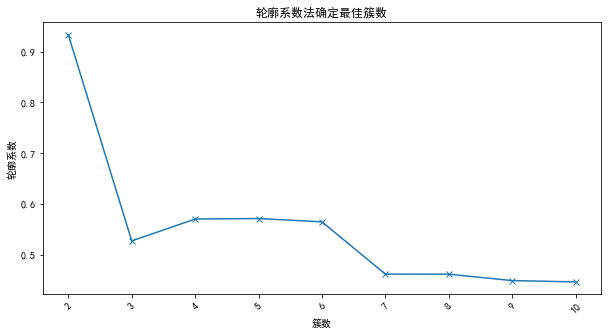

In [60]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=28)
    kmeans.fit(scaled_features)
    labels = kmeans.labels_
    score = silhouette_score(scaled_features, labels)
    silhouette_scores.append(score)
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='x')
plt.xlabel('簇数')
plt.xticks(rotation=45)
plt.ylabel('轮廓系数')
plt.title('轮廓系数法确定最佳簇数')
plt.show()

E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

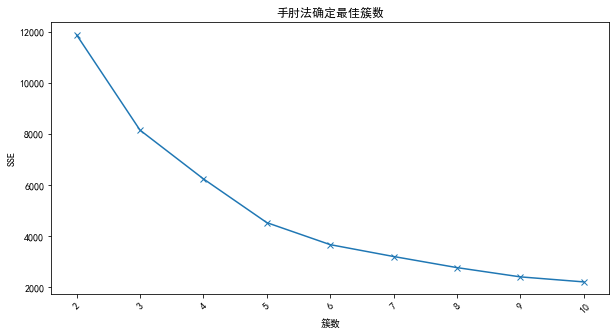

In [52]:
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=28)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

# 绘制手肘图
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), sse, marker='x')
plt.xlabel('簇数')
plt.xticks(rotation=45)
plt.ylabel('SSE')
plt.title('肘部法确定最佳簇数')
plt.show()

# =================================================================================================================

E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

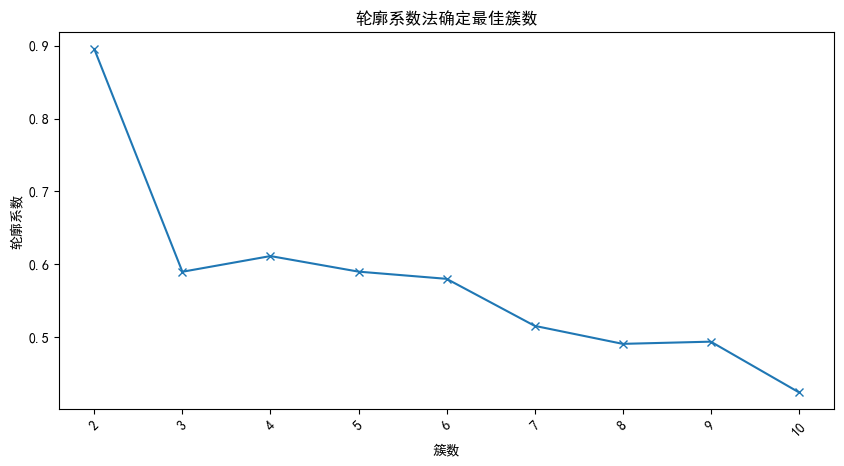

E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

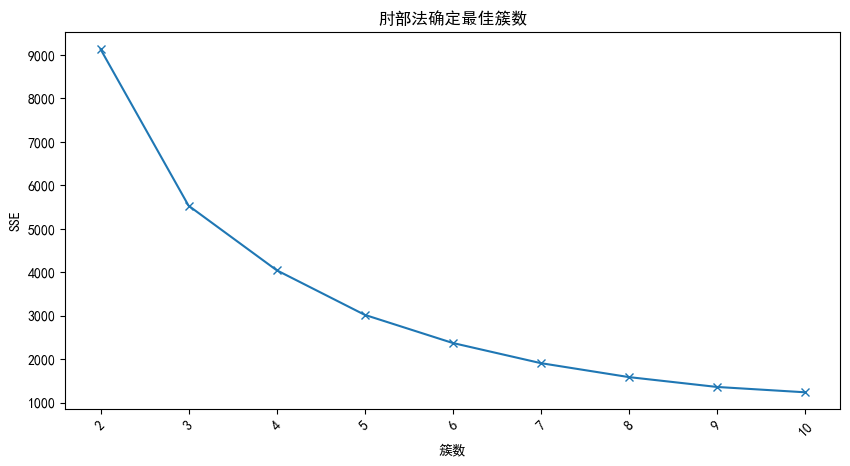

In [73]:
scaler = StandardScaler()
features = rfm[['Recency', 'InvoiceNo_Category_Count', 'Monetary']]
scaled_features = scaler.fit_transform(features)
scaled_features_df = pd.DataFrame(scaled_features, columns=['Recency', 'InvoiceNo_Category_Count', 'Monetary'])
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=28)
    kmeans.fit(scaled_features)
    labels = kmeans.labels_
    score = silhouette_score(scaled_features, labels)
    silhouette_scores.append(score)
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='x')
plt.xlabel('簇数')
plt.xticks(rotation=45)
plt.ylabel('轮廓系数')
plt.title('轮廓系数法确定最佳簇数')
plt.show()
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=28)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

# 绘制手肘图
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), sse, marker='x')
plt.xlabel('簇数')
plt.xticks(rotation=45)
plt.ylabel('SSE')
plt.title('肘部法确定最佳簇数')
plt.show()

E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


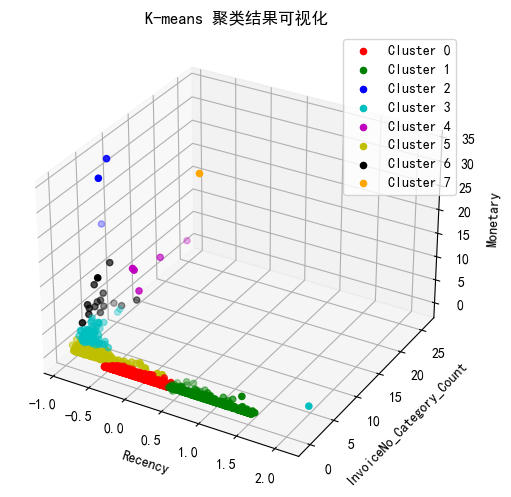

In [74]:
kmeans = KMeans(n_clusters=8 , random_state=28)
kmeans.fit(scaled_features_df)
scaled_features_df['Cluster_Label'] = labels
# 绘制 3D 可视化图
plt.rcParams['figure.dpi'] = 100
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple']
for i in range(8):
    cluster = scaled_features_df[scaled_features_df['Cluster_Label'] == i]
    ax.scatter(cluster['Recency'], cluster['InvoiceNo_Category_Count'], cluster['Monetary'], c=colors[i], label=f'Cluster {i}')

ax.set_xlabel('Recency')
ax.set_ylabel('InvoiceNo_Category_Count')
ax.set_zlabel('Monetary')
ax.set_title('K-means 聚类结果可视化')
ax.legend()

plt.show()

# =========================================

E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

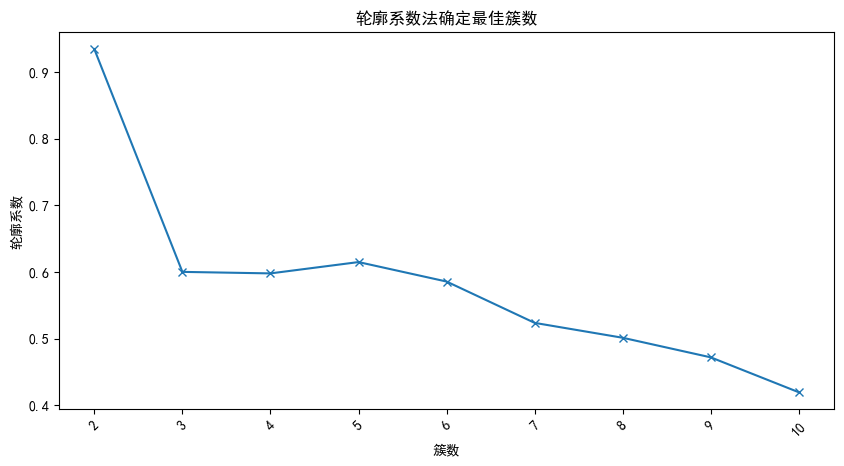

E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

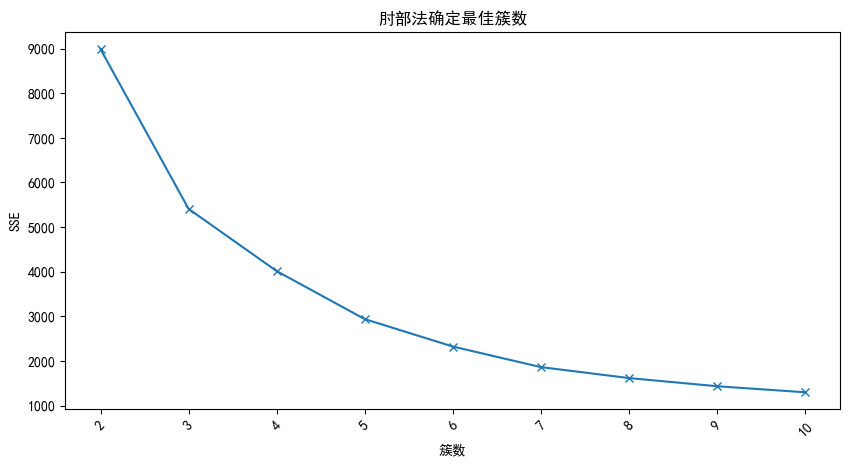

In [75]:
scaler = StandardScaler()
features = rfm[['Recency', 'InvoiceNo_Total_Count', 'Monetary']]
scaled_features = scaler.fit_transform(features)
scaled_features_df = pd.DataFrame(scaled_features, columns=['Recency', 'InvoiceNo_Total_Count', 'Monetary'])
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=28)
    kmeans.fit(scaled_features)
    labels = kmeans.labels_
    score = silhouette_score(scaled_features, labels)
    silhouette_scores.append(score)
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='x')
plt.xlabel('簇数')
plt.xticks(rotation=45)
plt.ylabel('轮廓系数')
plt.title('轮廓系数法确定最佳簇数')
plt.show()
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=28)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

# 绘制手肘图
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), sse, marker='x')
plt.xlabel('簇数')
plt.xticks(rotation=45)
plt.ylabel('SSE')
plt.title('肘部法确定最佳簇数')
plt.show()

E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


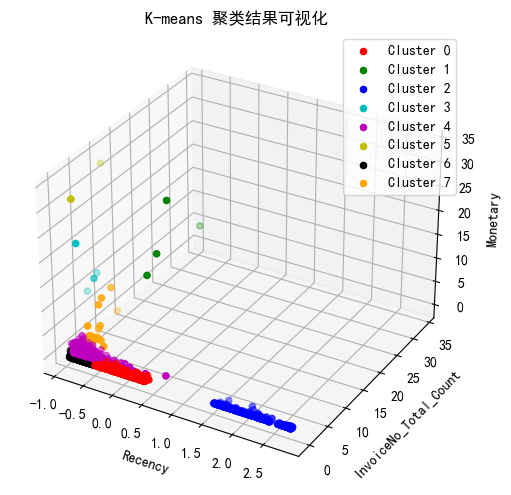

In [77]:
kmeans = KMeans(n_clusters=8 , random_state=28)
kmeans.fit(scaled_features_df)
scaled_features_df['Cluster_Label'] = labels
# 绘制 3D 可视化图
plt.rcParams['figure.dpi'] = 100
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple']
for i in range(8):
    cluster = scaled_features_df[scaled_features_df['Cluster_Label'] == i]
    ax.scatter(cluster['Recency'], cluster['InvoiceNo_Total_Count'], cluster['Monetary'], c=colors[i], label=f'Cluster {i}')

ax.set_xlabel('Recency')
ax.set_ylabel('InvoiceNo_Total_Count')
ax.set_zlabel('Monetary')
ax.set_title('K-means 聚类结果可视化')
ax.legend()

plt.show()

,CustomerID,Recency,InvoiceNo_Category_Count,InvoiceNo_Total_Count,Monetary
0,12346,30030180,2,2,0.00
1,12347,2102880,7,182,4310.00
2,12348,8419620,4,31,1797.24
3,12349,3506940,1,73,1757.55
4,12350,28713540,1,17,334.40
...,...,...,...,...,...
4366,18280,25884480,1,10,180.60
4367,18281,17500020,1,7,80.82
4368,18282,2549820,3,13,176.60
4369,18283,2203080,16,756,2094.88
